In [69]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.figure as fig
import math

fname = ["astro", "blast2_p", "bump", "dpot", "eddy", "fish", "sedov_p", "yf17_p", "yf17_t"]
err = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e-0] # point-wise relative error bound
intvCapacity = 2097152

def hitratio_estimation(fname):
    
    hitratio_o = []
    with open(fname+"-hitratio.txt") as inputfile:
        for line in inputfile:
            hitratio_o.append(float(line.strip('\n')))

    hitratio_o=np.flip(hitratio_o,0)
    
    data=[]
    with open(fname+'-data.txt') as inputfile:
        for line in inputfile:
            data.append(float(line.strip('\n')))

#     subdata = 0
#     j = 0
#     for i in range(0,len(data)):
#         if(i%32==0):
#             j=j+1
#             subdata = subdata+data[i]
#     mean_sub = subdata/j # the mean of points that decides the real_precision
        
    hitratio_esti = []
    
    for i in range(0,12):
        
        realPrecision = []
        for k in range(0,len(data)):
            if(k%32==0):
                if(data[k] !=0):
                    realPrecision.append(data[k]*err[i])
                elif data[k] == 0:
                    realPrecision.append(err[i])
#         print(len(realPrecision))        
        
        count = 0
        miss = 0

        prediction_esti = np.zeros(len(data))
        prediction_esti[0] = data[0]
        prediction_esti[1] = data[1]

        prederr_esti = np.zeros(len(data))
#         prederr_esti[0] = 0
#         prederr_esti[1] = 0

#         prediction_esti = []
#         prediction_esti.append(data[0])
#         prediction_esti.append(data[1])
#         prederr_esti = []
#         prederr_esti.append(data[0]-prediction_esti[0])
#         prederr_esti.append(data[1]-prediction_esti[1])
        
        h = 0
        realP = realPrecision[h]
        checkRadius = (intvCapacity-1)*realP
        interval = 2*realP
        h = h+1
#         radius_esti = (intvCapacity-1)*mean_sub*err[i] # checkradius = (intvCapacity-1)*pwrErrorBound

#         print(len(data))
        for j in range(2,len(data)):
            if(j % 32 == 0):
#                 print("j:",j,"h:",h)
                realP = realPrecision[h]
                checkRadius = (intvCapacity-1)*realP
                interval = 2*realP
                h = h+1
                
#             pred = 2*data[j-1]-data[j-2]
#             pred = 2*prediction_esti[j-1] - prediction_esti[j-2]
#             prederr = data[j]- pred
#             prediction_esti.append(2*data[j-1]-data[j-2])
#             prediction_esti.append(2*prediction_esti[j-1]-prediction_esti[j-2])
#             prederr_esti.append(data[j]-prediction_esti[j])

#             prediction_esti[j] = 2*prediction_esti[j-1] - prediction_esti[j-2]
            prediction_esti[j] = 2*data[j-1]-data[j-2]
            prederr_esti[j] = data[j] - prediction_esti[j]
            
            if (abs(prederr_esti[j]) < checkRadius): # Hit
                count = count+1
                state = (prederr_esti[j]/realP+1)/2
                
                if(data[j] >= prediction_esti[j]):
                    prediction_esti[j] = prediction_esti[j] + state*interval
                    
                elif (data[j] < prediction_esti[j]):
                    prediction_esti[j] = prediction_esti[j] - state*interval
#                 else
#                     prediction_esti.append(pred)
                        
            else: # Miss
#                 miss = miss + 1
                prediction_esti[j]=(data[j])
        hitratio_esti.append(count/len(data))
#         print(count)
    return hitratio_esti, hitratio_o

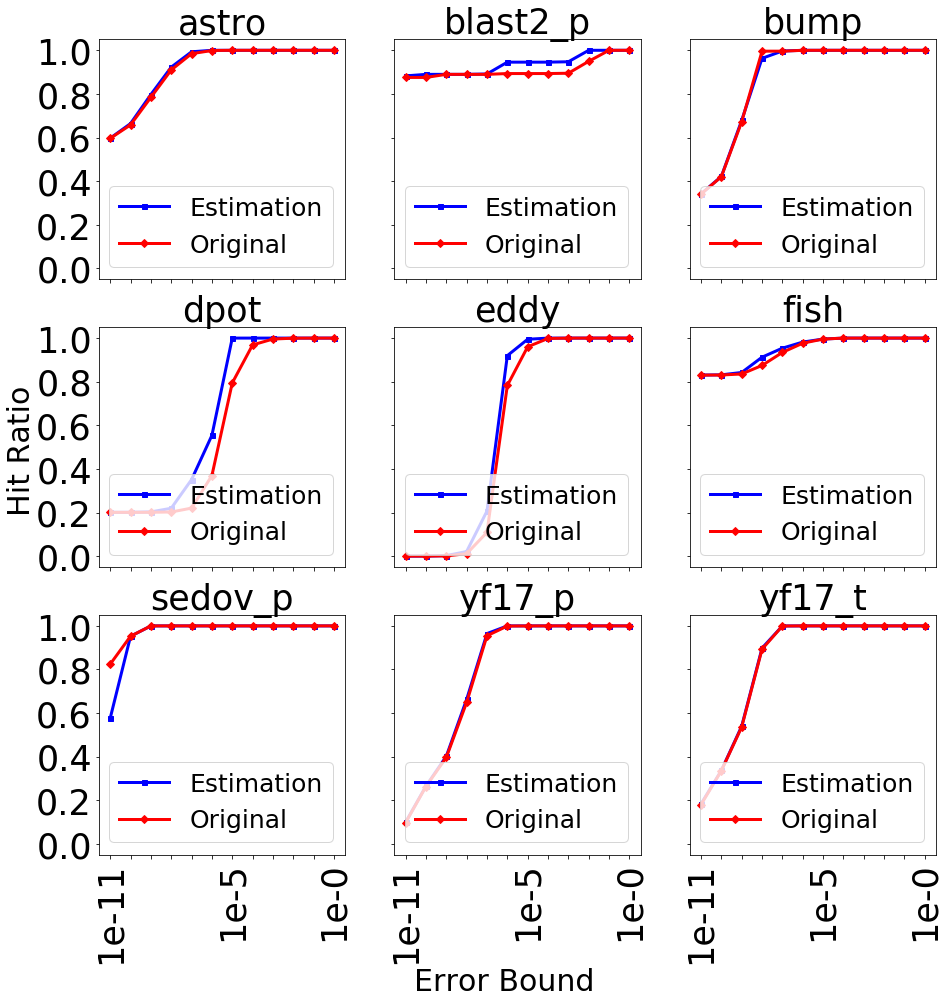

In [70]:
fig, axes  = plt.subplots(nrows=3, ncols=3, sharex=True,sharey=True, figsize=(15,15))
x = np.arange(1,13)

plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12], xticklabels=['1e-11','','','','','','1e-5','','','','','1e-0'],yticks=([0,0.2,0.4,0.6,0.8,1]))
plt.setp(axes[2][0].get_xticklabels(), rotation=90)
plt.setp(axes[2][1].get_xticklabels(), rotation=90)
plt.setp(axes[2][2].get_xticklabels(), rotation=90)

# for i in range(0,3):
#     for j in range(0,3):
for i in range(0,len(fname)):
        hitratio_esti, hitratio_o = hitratio_estimation(fname[i])
        if i==3:
            hitratio_esti[6:12] = [1,1,1,1,1,1]
        axes[int(i/3)][i%3].plot(x,hitratio_esti,'bs-',linewidth=3,markersize=5,label="Estimation")
        axes[int(i/3)][i%3].plot(x,hitratio_o,'rD-',linewidth=3,markersize=5,label="Original")
        axes[int(i/3)][i%3].set_title(fname[i])
        axes[int(i/3)][i%3].legend(loc="lower right")

# axes[2][0].set_xlabel("Error-bound")
# axes[2][1].set_xlabel("Error-bound")
# axes[2][2].set_xlabel("Error-bound")
# axes[0][0].set_ylabel("Hit-ratio")
# axes[1][0].set_ylabel("Hit-ratio")
# axes[2][0].set_ylabel("Hit-ratio")

fig.text(0.5, 0.0, 'Error Bound', ha='center')
fig.text(0.04, 0.5, 'Hit Ratio', va='center', rotation='vertical')

plt.rc('font', size=30)          # controls default text sizes
# plt.rc('axes', titlesize=35)     # fontsize of the axes title
# plt.rc('axes', labelsize=35)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=35)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=35)    # fontsize of the tick labels
plt.rc('legend', fontsize=25)    # legend fontsize
# plt.rc('figure', titlesize=35)  # fontsize of the figure title
# plt.legend(loc=2, bbox_to_anchor=(1.05,1),borderaxespad=0)
# plt.suptitle('Hit-Ratio Estimation')
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('hitratio_esti.pdf')

plt.show()
plt.clf()

[0.5763206388206388, 0.9522548116298116, 0.9998464373464373, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063, 0.9999744062244063]


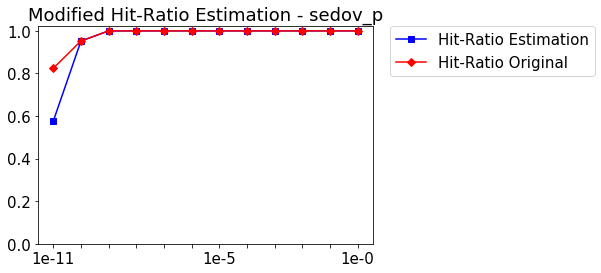

In [3]:
hitratio_esti, hitratio_o = hitratio_estimation(fname[6])
print(hitratio_esti)

plt.plot(np.arange(1,13),hitratio_esti,'bs-',label="Hit-Ratio Estimation")
plt.plot(np.arange(1,13),hitratio_o,'rD-',label="Hit-Ratio Original")

lgd=plt.legend(loc=2, bbox_to_anchor=(1.05,1),borderaxespad=0)
plt.rc('font', size=15)          # controls default text sizes
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['1e-11','','','','','','1e-5','','','','','1e-0'])
plt.title("Modified Hit-Ratio Estimation - "+fname[6])
plt.yticks([0,.2,.4,.6,.8,1])
# plt.title('Original/Estimation of Hit-Ratio(Astro)')
# plt.savefig('astro_hre.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()
plt.clf()

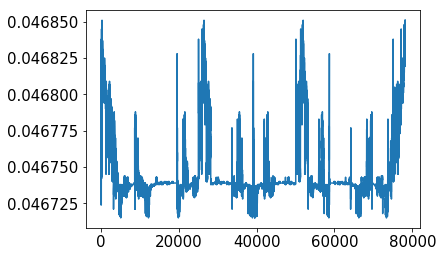

In [38]:
fname = "sedov_p"
data=[]
with open(fname+'-data.txt') as inputfile:
    for line in inputfile:
        data.append(float(line.strip('\n')))
plt.plot(np.arange(len(data)),data)
plt.show()
plt.clf()